In [ ]:
!git add .


In [20]:
# 문제 제시 : 최규빈 교수님 풀이에 주관적인 해답 존재

# 4. FIFA23 시각화 -- 문제

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를 시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와 `SlidingTackle`의 산점도를 그려라. – (30점)

***세부지침***

**A**. Column의 이름에서 공백을 제거하라. 

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 `.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라. 변환된 값을 `df.Position`에 저장하라. 

In [3]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [4]:
df.columns = [col.replace(' ','') for col in df.columns ]

In [5]:
df =df.loc[:,df.isna().mean()<0.5]
df = df.dropna()

In [6]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


In [21]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

[df.Position]
```
0        <span class="pos pos18">CAM

1        <span class="pos pos11">LDM

2         <span class="pos pos24">RS
```

In [8]:
df['Position'] = df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

In [9]:
#apply(lambda x: [k for k,v in position_dict.items() if x in v][0])
# position_dict 의 items 중 value 를 가지고있다면 key 로 변환


In [10]:
df.Position

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
16703           RES
16704           RES
16706           RES
16707           RES
16708           SUB
Name: Position, Length: 14398, dtype: object

In [15]:
import numpy as np
from plotnine import *

In [16]:
df['Wage'] = df.Wage.str[1:].str.replace('K','000').str.replace('M','000000').astype(int)

AttributeError: Can only use .str accessor with string values!

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는 관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라. 이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

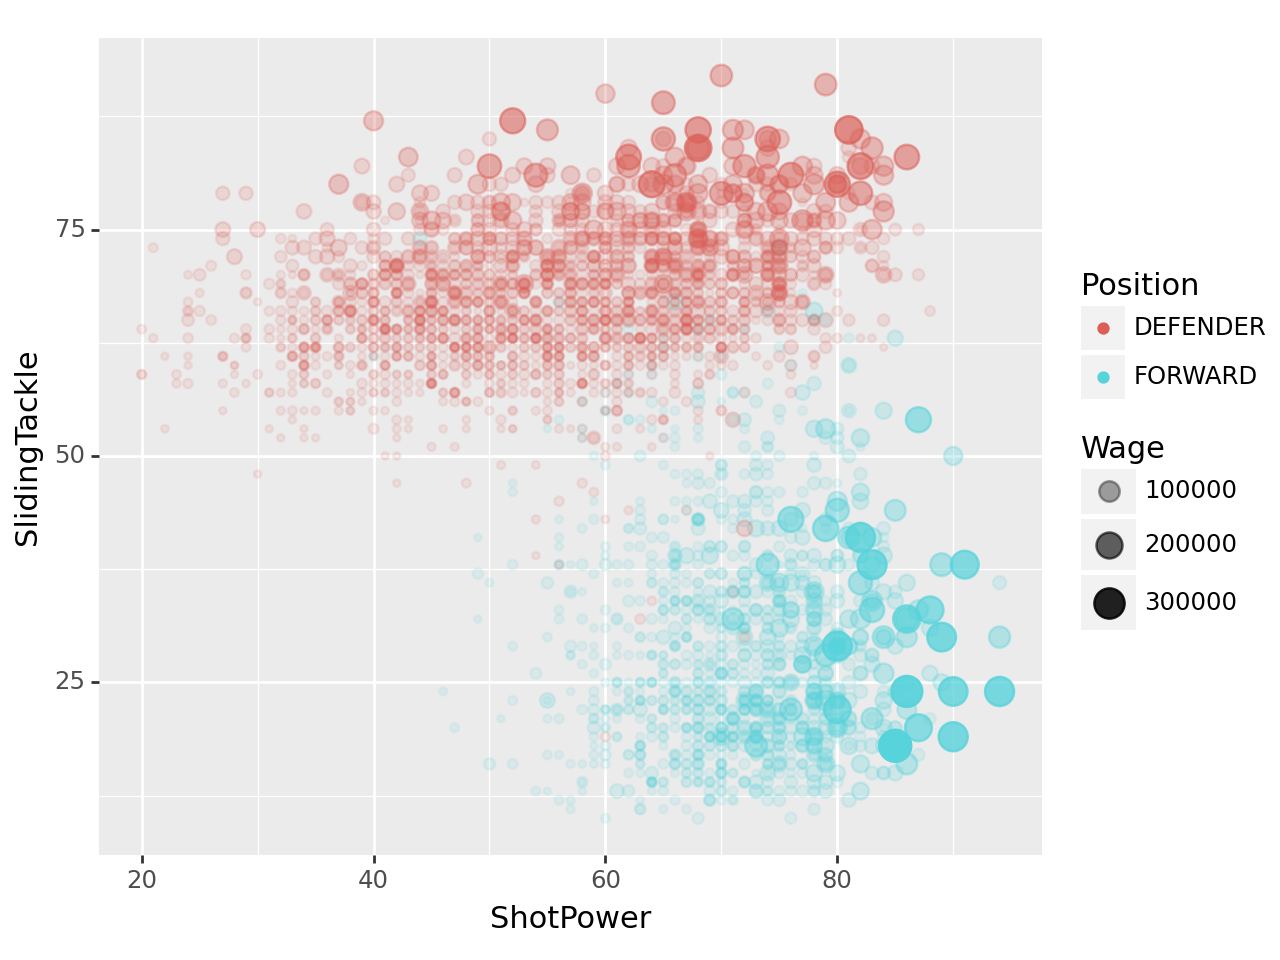

<Figure Size: (640 x 480)>

In [26]:
df1 = df.query('Position=="DEFENDER" or Position=="FORWARD"')
fig = ggplot(df1)
point = geom_point(aes(x='ShotPower',y="SlidingTackle",color="Position",size="Wage",alpha="Wage"))
fig + point
